In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

# Для kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Для дерева прийняття рішень
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Для Random Forest
from sklearn.ensemble import RandomForestClassifier

# Для методу опорних векторів SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Для AdaBoost
from sklearn.ensemble import AdaBoostClassifier

In [62]:
# Посилання на датасет:
# https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

In [63]:
milk = pd.read_csv('milknew.csv')
milk

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [64]:
milk.dropna(inplace=True)
milk

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [65]:
milk.isnull().any()

pH            False
Temprature    False
Taste         False
Odor          False
Fat           False
Turbidity     False
Colour        False
Grade         False
dtype: bool

In [66]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1059 entries, 0 to 1058
Data columns (total 8 columns):
pH            1059 non-null float64
Temprature    1059 non-null int64
Taste         1059 non-null int64
Odor          1059 non-null int64
Fat           1059 non-null int64
Turbidity     1059 non-null int64
Colour        1059 non-null int64
Grade         1059 non-null object
dtypes: float64(1), int64(6), object(1)
memory usage: 70.3+ KB


In [67]:
nameDict={"Fat ":"Fat"}
milk=milk.rename(columns=nameDict)
milk

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


## Візуалізація даних

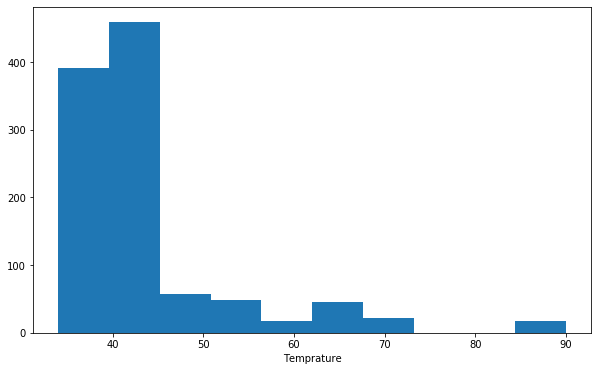

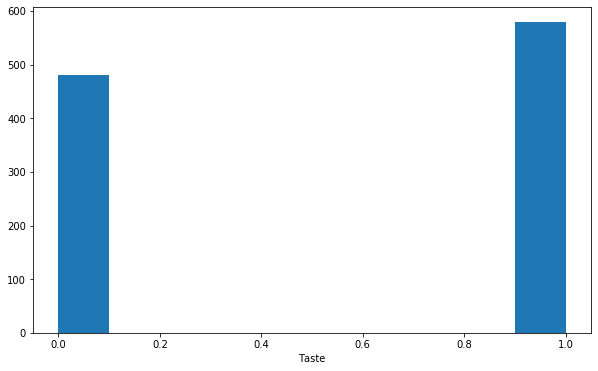

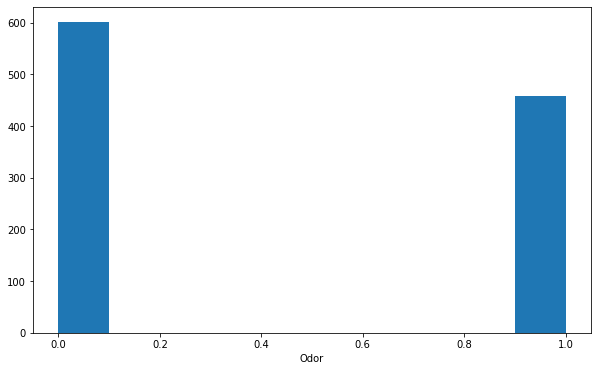

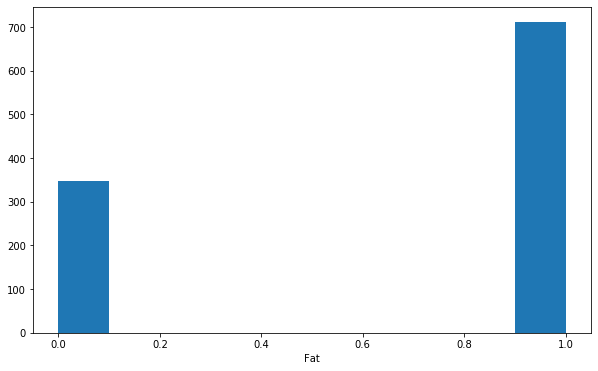

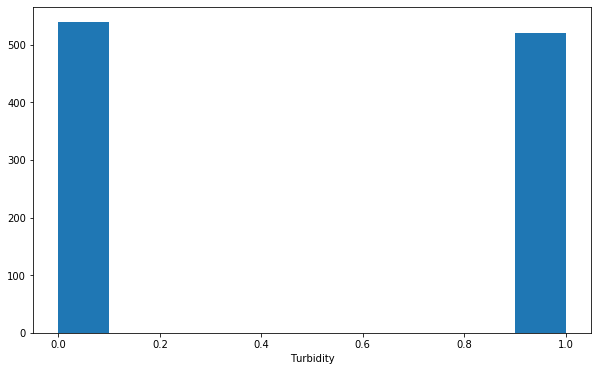

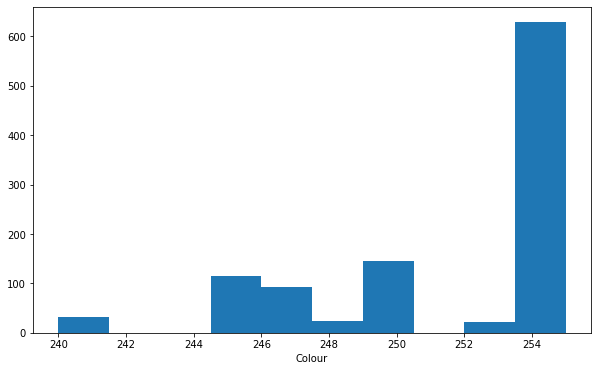

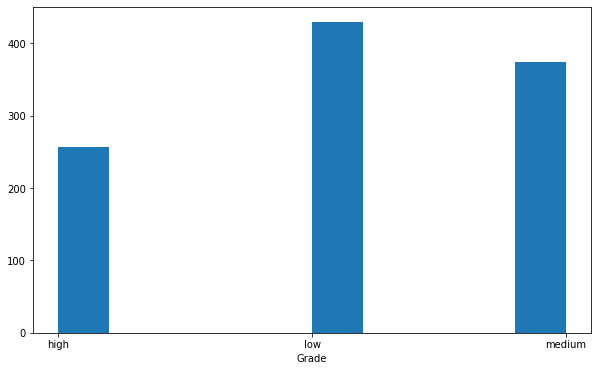

In [68]:
for i in range(1, len(milk.columns)):
    plt.figure(figsize=(10, 6))
    plt.hist(milk[milk.columns[i]])
    plt.xlabel(milk.columns[i])
    plt.show()

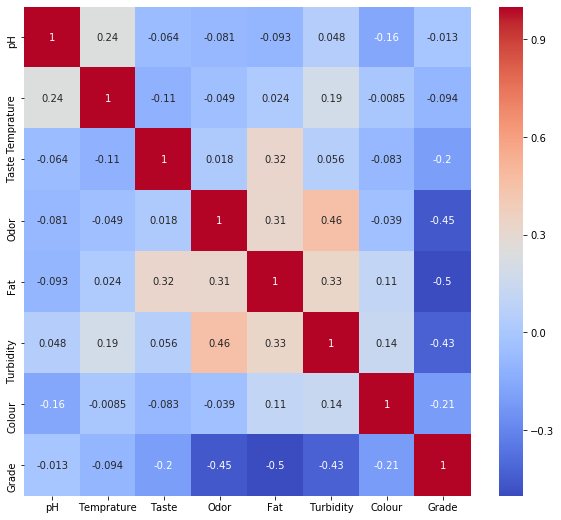

In [115]:
corr = milk.corr()
plt.figure(figsize=(10,9))
ax = sns.heatmap(corr, cmap='coolwarm', annot=True, fmt = '.2g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [70]:
label_encoder = LabelEncoder()

categorical_features = ["Grade"]
for feature in categorical_features:
    print(milk[feature].unique())
    milk[feature]=label_encoder.fit_transform(milk[feature])
    print(milk[feature].unique())

['high' 'low' 'medium']
[0 1 2]


## Boxplot 

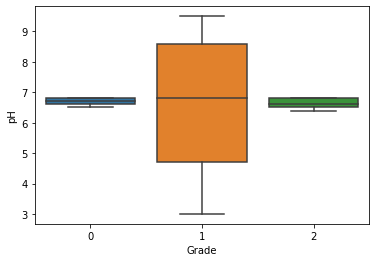

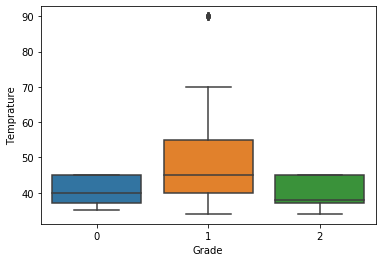

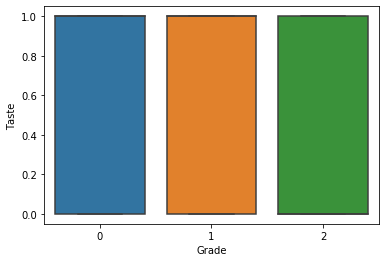

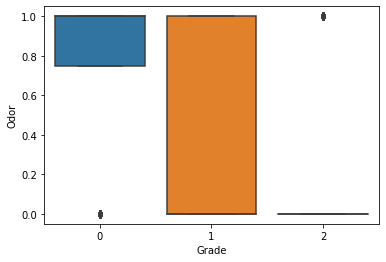

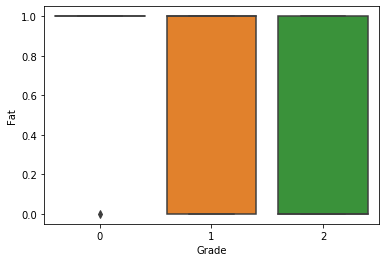

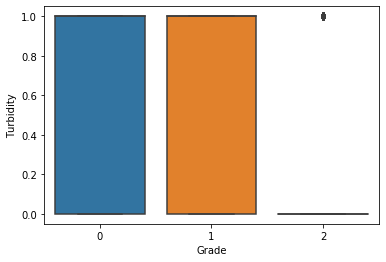

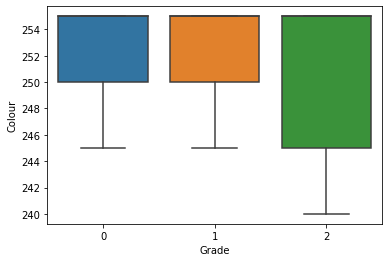

In [71]:
for i in range(len(milk.columns) - 1):
    figure = plt.figure()
    ax = sns.boxplot(x=milk['Grade'], y=milk.columns[i], data=milk)

## Train-test split 

In [72]:
Y = milk['Grade']
X = milk.drop('Grade', axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=0)

## Нормалізація даних 

In [73]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test) 

## kNN

In [74]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(scaled_X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [75]:
pred = knn.predict(scaled_X_test)

In [76]:
print(confusion_matrix(Y_test,pred))

[[131   0   6]
 [  2 200   3]
 [  0   1 187]]


In [77]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       137
           1       1.00      0.98      0.99       205
           2       0.95      0.99      0.97       188

    accuracy                           0.98       530
   macro avg       0.98      0.98      0.98       530
weighted avg       0.98      0.98      0.98       530



In [78]:
print('Точність:', accuracy_score(Y_test,pred))

Точність: 0.9773584905660377


## Обираємо параметр k 

In [79]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,Y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != Y_test))

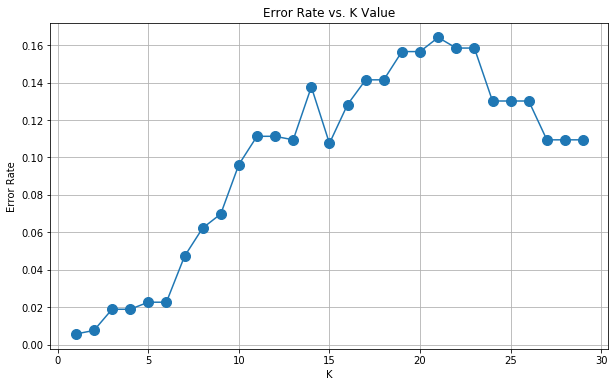

In [80]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [81]:
error_rate = []

for i in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,Y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != Y_test))

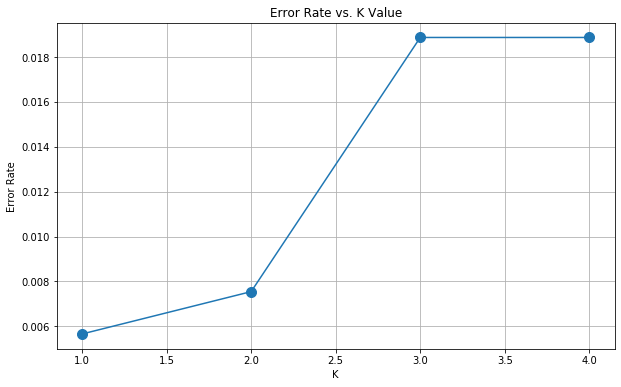

In [82]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [83]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(scaled_X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [84]:
pred = knn.predict(scaled_X_test)

In [85]:
print(confusion_matrix(Y_test,pred))

[[137   0   0]
 [  2 202   1]
 [  0   1 187]]


In [86]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       137
           1       1.00      0.99      0.99       205
           2       0.99      0.99      0.99       188

    accuracy                           0.99       530
   macro avg       0.99      0.99      0.99       530
weighted avg       0.99      0.99      0.99       530



In [87]:
print('Точність:', accuracy_score(Y_test,pred))

Точність: 0.9924528301886792


## Дерево прийняття рішень 

In [88]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

In [89]:
print(confusion_matrix(Y_test, y_pred))

[[136   0   1]
 [  2 202   1]
 [  0   0 188]]


In [90]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       137
           1       1.00      0.99      0.99       205
           2       0.99      1.00      0.99       188

    accuracy                           0.99       530
   macro avg       0.99      0.99      0.99       530
weighted avg       0.99      0.99      0.99       530



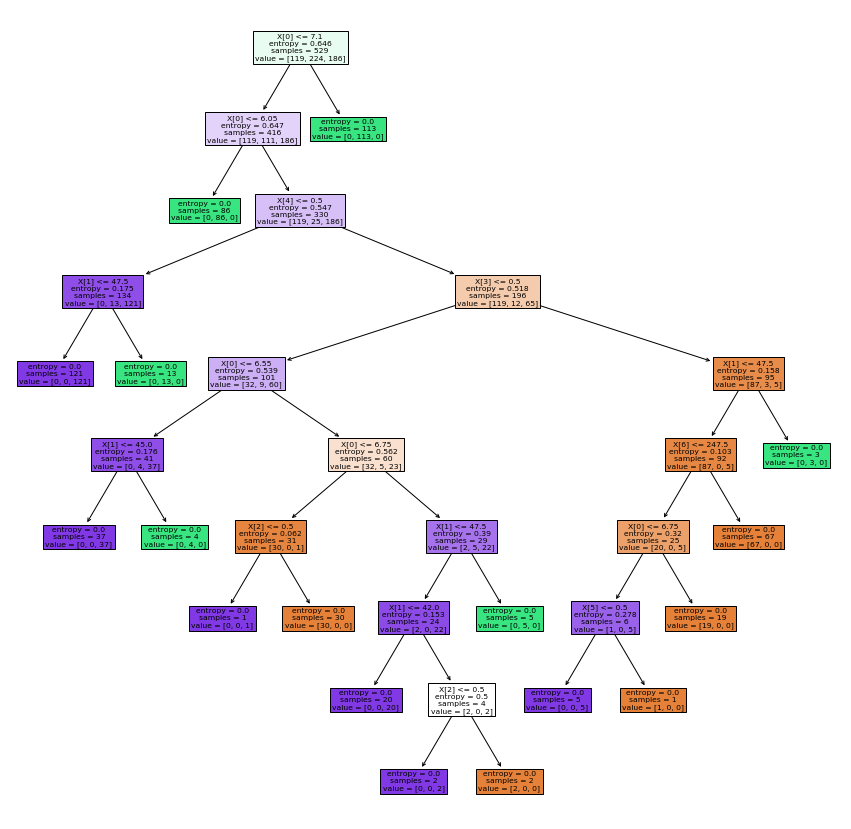

In [91]:
plt.figure(figsize = (15, 15))
plot_tree(model, filled = True)
plt.show()

In [92]:
print('Точність:', accuracy_score(Y_test,y_pred))

Точність: 0.9924528301886792


## Random Forest

In [133]:
for i in range (2, 23):
    forest = RandomForestClassifier (criterion='entropy', n_estimators = i)
    forest.fit(X_train, Y_train) 
    y_pred = forest.predict(X_test)
    print ('Кількість дерев: ', i)
    accuracy = accuracy_score(Y_test, y_pred)
    print("Точність: ", accuracy)

Кількість дерев:  2
Точність:  0.9962264150943396
Кількість дерев:  3
Точність:  0.9924528301886792
Кількість дерев:  4
Точність:  0.9943396226415094
Кількість дерев:  5
Точність:  0.9943396226415094
Кількість дерев:  6
Точність:  0.9943396226415094
Кількість дерев:  7
Точність:  0.9924528301886792
Кількість дерев:  8
Точність:  0.9924528301886792
Кількість дерев:  9
Точність:  0.9905660377358491
Кількість дерев:  10
Точність:  0.9924528301886792
Кількість дерев:  11
Точність:  0.9924528301886792
Кількість дерев:  12
Точність:  0.9924528301886792
Кількість дерев:  13
Точність:  0.9924528301886792
Кількість дерев:  14
Точність:  0.9924528301886792
Кількість дерев:  15
Точність:  0.9924528301886792
Кількість дерев:  16
Точність:  0.9924528301886792
Кількість дерев:  17
Точність:  0.9924528301886792
Кількість дерев:  18
Точність:  0.9924528301886792
Кількість дерев:  19
Точність:  0.9943396226415094
Кількість дерев:  20
Точність:  0.9924528301886792
Кількість дерев:  21
Точність:  0.99245

In [134]:
forest = RandomForestClassifier (criterion='entropy', n_estimators = 6)
forest.fit(X_train, Y_train) 
y_pred = forest.predict(X_test)

In [135]:
print(confusion_matrix(Y_test, y_pred))

[[137   0   0]
 [  1 202   2]
 [  0   0 188]]


In [136]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       137
           1       1.00      0.99      0.99       205
           2       0.99      1.00      0.99       188

    accuracy                           0.99       530
   macro avg       0.99      1.00      0.99       530
weighted avg       0.99      0.99      0.99       530



In [137]:
accuracy = accuracy_score(Y_test, y_pred)
print("Точність: ", accuracy)

Точність:  0.9943396226415094


## Метод опорних векторів (SVM) 

In [98]:
model = SVC(C=1.0, gamma = 1.0, kernel = 'rbf')
model.fit(scaled_X_train,Y_train)

y_pred = model.predict(scaled_X_test)

In [99]:
print(confusion_matrix(Y_test, y_pred))

[[134   3   0]
 [  0 205   0]
 [ 25   0 163]]


In [100]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       137
           1       0.99      1.00      0.99       205
           2       1.00      0.87      0.93       188

    accuracy                           0.95       530
   macro avg       0.94      0.95      0.94       530
weighted avg       0.95      0.95      0.95       530



In [101]:
print('Точність:', accuracy_score(Y_test,y_pred))

Точність: 0.9471698113207547


## Gridsearch 

In [102]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True)

grid.fit(scaled_X_train,Y_train)

C:\Users\olgam\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\olgam\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [103]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [104]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [105]:
grid_predictions = grid.predict(scaled_X_test)

In [106]:
print(confusion_matrix(Y_test,grid_predictions))

[[134   3   0]
 [  0 205   0]
 [  0   0 188]]


In [107]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       137
           1       0.99      1.00      0.99       205
           2       1.00      0.87      0.93       188

    accuracy                           0.95       530
   macro avg       0.94      0.95      0.94       530
weighted avg       0.95      0.95      0.95       530



In [108]:
print('Точність:', accuracy_score(Y_test,grid_predictions))

Точність: 0.9943396226415094


## AdaBoost 

In [109]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

In [110]:
print(confusion_matrix(Y_test,y_pred))

[[  0   0 137]
 [  0 202   3]
 [  0   0 188]]


In [111]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       137
           1       1.00      0.99      0.99       205
           2       0.57      1.00      0.73       188

    accuracy                           0.74       530
   macro avg       0.52      0.66      0.57       530
weighted avg       0.59      0.74      0.64       530



C:\Users\olgam\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [112]:
print('Точність:', accuracy_score(Y_test,y_pred))

Точність: 0.7358490566037735
